# Bonds Project

*By Clara Rohrbasser, Daniel Deutsch and José Lucas Barretto*

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [203]:
# Matplotlib style
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 7),
    'axes.prop_cycle': plt.cycler(color=['#4C72B0', '#C44E52', '#55A868', '#8172B2', '#CCB974', '#64B5CD']),
    'axes.facecolor': '#EAEAF2'
})

# Data Ingestion

In [204]:
# Import each dataframe
df_claims = pd.read_csv("http://freakonometrics.free.fr/sinistreACT2040.txt", sep=';')
df_contracts = pd.read_csv("http://freakonometrics.free.fr/contractACT2040.txt", sep=';')

# Data Processing

## Claims

In [205]:
# Filters claims 
df_claims = df_claims[df_claims['garantie'] == '1RC'].reset_index(drop=True)

# Obtains the sum and average of costs by contract 
df_claims = df_claims.groupby('nocontrat').agg({'cout': ['sum', 'count']}).droplevel(level=0, axis=1).reset_index()
df_claims.rename(columns={'sum': 'claim_value', 'count': 'n_claims'}, inplace=True)

# Converts dtypes
df_claims = df_claims.apply(pd.to_numeric, errors='ignore')

## Contracts

In [206]:
# Converts dtypes
df_contracts = df_contracts.apply(pd.to_numeric, errors='ignore')

# Drops unused columns
df_contracts = df_contracts.drop('bonus', axis=1)

## Merge Dataframes

In [207]:
df = pd.merge(df_claims, df_contracts, right_on='nocontrat', left_on='nocontrat', how='outer')
df['has_claimed'] = df['n_claims'] > 0
df.fillna({'claim_value': 0, 'n_claims': 0}, inplace=True)

# Data Visualization

## Claims

### Claim Value Distribution

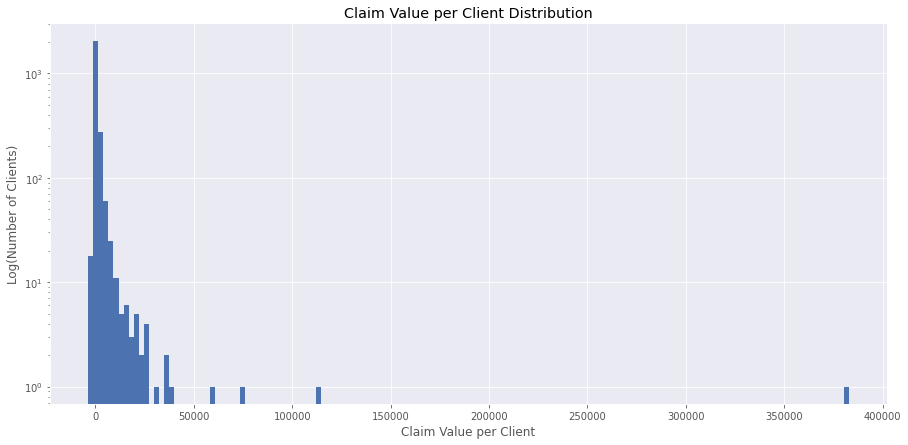

In [208]:
df_claims.hist('claim_value', log=True, bins=150)
plt.title("Claim Value per Client Distribution")
plt.ylabel("Log(Number of Clients)")
plt.xlabel("Claim Value per Client")
plt.show()

### Number of Claims per Client

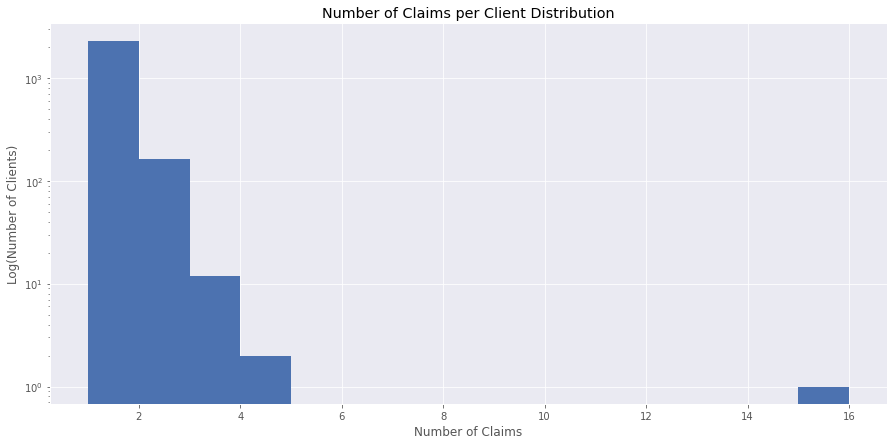

In [209]:
df_claims.hist('n_claims', log=True, bins=15)
plt.title("Number of Claims per Client Distribution")
plt.ylabel("Log(Number of Clients)")
plt.xlabel("Number of Claims")
plt.show()

## Contracts

### Correlation Matrix of the Contracts Features

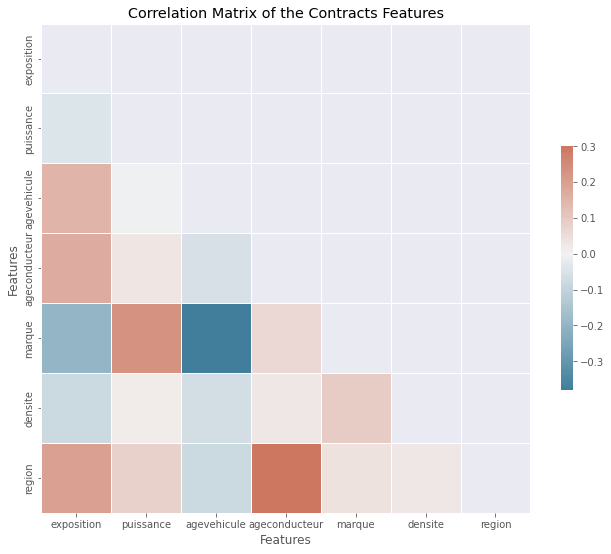

In [210]:
# Compute the correlation matrix
corr = df_contracts.drop(columns=['nocontrat']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix of the Contracts Features")
plt.ylabel("Features")
plt.xlabel("Features")
plt.show()

## Full Dataframe

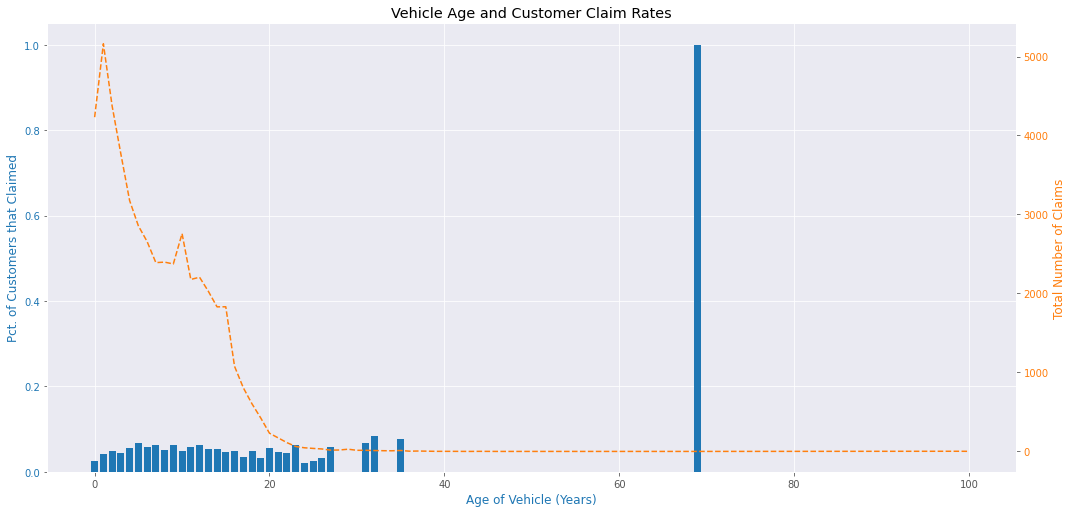

In [233]:
claim_rate = df.groupby('agevehicule')['has_claimed'].agg(['sum', 'count']).reset_index()
claim_rate['pct_claimed'] = claim_rate['sum']/claim_rate['count']

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('Pct. of Customers that Claimed', color=color)
ax1.set_xlabel('Age of Vehicle (Years)', color=color)
ax1.bar(claim_rate['agevehicule'], claim_rate['pct_claimed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Total Number of Claims', color=color)  # we already handled the x-label with ax1
ax2.plot(claim_rate['agevehicule'], claim_rate['count'], '--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(False)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Vehicle Age and Customer Claim Rates')
plt.show()


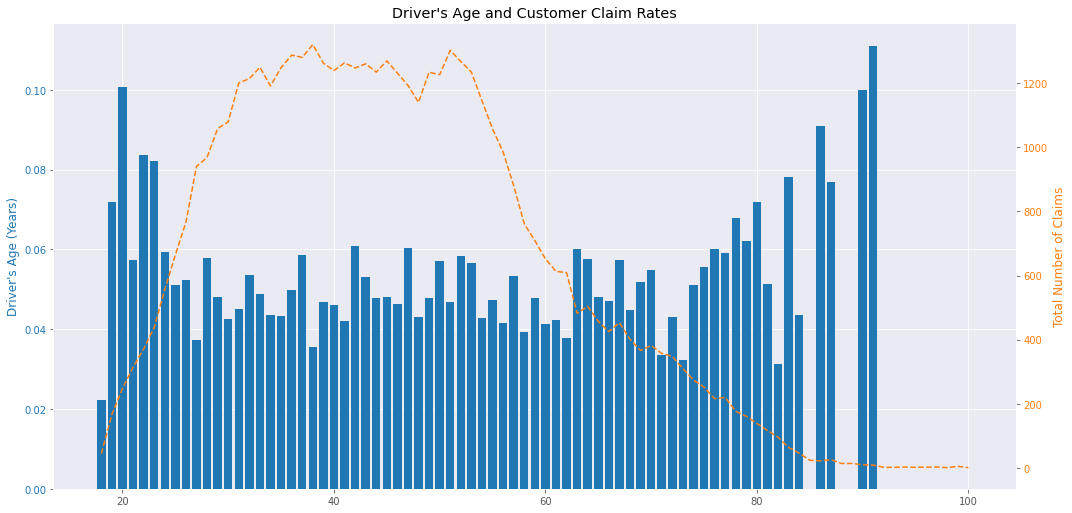

In [230]:
claim_rate = df.groupby('ageconducteur')['has_claimed'].agg(['sum', 'count']).reset_index()
claim_rate['pct_claimed'] = claim_rate['sum']/claim_rate['count']

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('Pct. of Customers that Claimed', color=color)
ax1.set_xlabel('Driver\'s Age (Years)', color=color)
ax1.bar(claim_rate['ageconducteur'], claim_rate['pct_claimed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Total Number of Claims', color=color)  # we already handled the x-label with ax1
ax2.plot(claim_rate['ageconducteur'], claim_rate['count'], '--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(False)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Driver\'s Age and Customer Claim Rates')
plt.show()

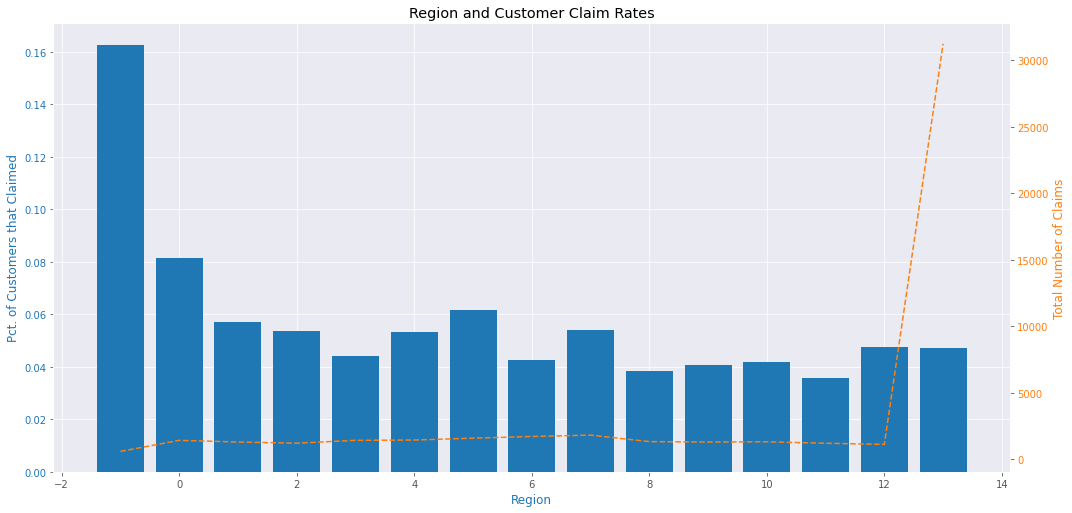

In [234]:
claim_rate = df.groupby('region')['has_claimed'].agg(['sum', 'count']).reset_index()
claim_rate['pct_claimed'] = claim_rate['sum']/claim_rate['count']

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('Pct. of Customers that Claimed', color=color)
ax1.set_xlabel('Region', color=color)
ax1.bar(claim_rate['region'], claim_rate['pct_claimed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Total Number of Claims', color=color)  # we already handled the x-label with ax1
ax2.plot(claim_rate['region'], claim_rate['count'], '--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(False)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Region and Customer Claim Rates')
plt.show()

* Distribution of claim values and frequencies per customer
* Correlation on features
* Univariate analysis of features in terms of claim value and frequency

* Model had_claim ~ characteristics
* Model claim_value ~ characteristics
* Interpret the models and visualizations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

